#**How Fast does a Nerf Gun Fire?**
Your mission, should you choose to accept (however, if you choose not to accept your grade will suffer!) is to determine the firing velocity of a Nerf gun using only a meterstick and tape measure!!!

In this activity, the student will be able to:

*   Collect range and height data using only a meterstick and tape measure
*   Use coding tools to generate visual media from data
*   Use coding tools to determine the firing velocity of the Nerf gun from the visual media
*   Use coding tools to statistically evaluate how accurate the results might be
*   Report the results and explain how the they were obtained and the confidence they have in the results using CER methodology.

In [ ]:
# import modules needed
import numpy as np #does math
import pandas as pd
import matplotlib as mpl #data visualization tool
import matplotlib.pyplot as plt #customize graphs

In [ ]:
#Import your data that you collected.

from google.colab import files #this will allow you to access and upload your file from the computer.
uploaded = files.upload()  #let it upload 100% before proceeding

Saving nerfdata1.csv to nerfdata1.csv


In [ ]:
import io
#be sure to type in the exact file name
dataset = pd.read_csv(io.BytesIO(uploaded['nerfdata1.csv']))
# Dataset is now stored in a Pandas Dataframe
dataset.head(5) #the number in parenthesis tells you how many lines of data will be shown, no number will show all data

,Height,Range
0,0.12,7.4
1,0.12,7.5
2,0.40,9.0
3,0.40,9.0
4,1.00,12.5


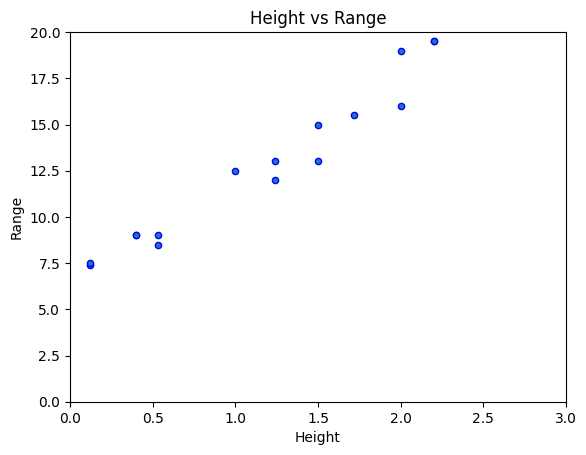

In [ ]:
#create a scatter plot graph for the data with proper labels
x=dataset.Height
y=dataset.Range
plt.scatter(x,y, s=20, alpha=1, edgecolors='blue') # defines the graph as a scatterplot with x and y
plt.ylim(0,20) #y-axis range
plt.xlim(0,3) #x-axis range
plt.title('Height vs Range')
plt.xlabel("Height")
plt.ylabel("Range")
plt.show()

#What Now?

What type of relationship is suggested by the graph?
 <font color='red'>linear except for the unexplainable y-intercept that is not negligible thus maybe parabolic</font>

What do you do next to test this relationship?
<font color='red'>square the y-axis</font>


In [ ]:
#Add another column of data so that you can create a linear graph
dataset['RangeSquared'] = dataset['Range']**2 #add to the data set with set name and = what calculation
dataset.head(5)

,Height,Range,RangeSquared
0,0.12,7.4,54.76
1,0.12,7.5,56.25
2,0.40,9.0,81.00
3,0.40,9.0,81.00
4,1.00,12.5,156.25


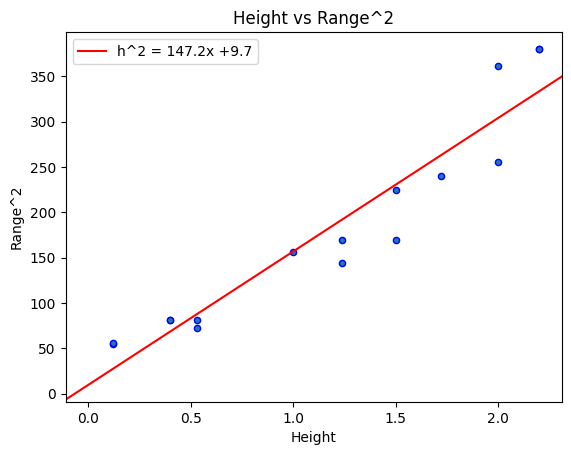

In [ ]:
# create a new graph that is properly labeled.
x=dataset.Height
y=dataset.RangeSquared
plt.scatter(x,y, s=20, alpha=1, edgecolors='blue') # defines the graph as a scatterplot with x and y
plt.title('Height vs Range^2')
plt.xlabel("Height")
plt.ylabel("Range^2")

# this will draw a best fit line based upon a slope and y-intercept
m, b = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, b), slope=m, label=f'h^2 = {m:.1f}x {b:+.1f}', color='r') #change your labels to reflect what is actually on the graph

plt.legend() #this will show the equation of the best fit line

plt.show()

#What type of relationship is now suggested?

<font color='red'>linear</font>

#Does it make sense for it to be this type of relationship?  Why or why not?

<font color='red'>Yes, when you have zero height there should be zero range</font>

#How reliable is the data?

What test could be done to evaluate if the data is reliable?
<font color='red'>chi-squared</font>

What variable would be the observed variable?
<font color='red'>Range Squared</font>

How would you determine the expected variable?
<font color='red'>Solve for h^2 value using the best-fit line equation </font>

Use the following equations to determine

[Standard Uncertainty](https://drive.google.com/uc?id=1blBgSBAgw8DJo64NXLNxpXlZdzp0ktTJ)

What does the letter "σ" stand for? <font color='red'>Standard Deviation</font>

What does the letter "N" stand for? <font color='red'>Number of Trials</font>

[chi2](https://drive.google.com/uc?id=1bzbOIHAUKgB6nz62aXVz006JOpsSYs1q)


What does the letter "y" stand for? <font color='red'>Measured Range^2</font>

What do the leffers "f(x)" stand for? <font color='red'>Calculated Range^2 based on best-fit line</font>

- The difference between "y" and "f(x)" is called the residual.

- The closer the chi-squared value is to 1 then the higher the probability the linear fit works for the scatter plot.




In [ ]:
#Count number of rows
n, _ = dataset.shape
n




16

In [ ]:
#Standard Deviation = σ
sd = dataset['RangeSquared'].std()
print(sd)

115.02463167368398


In [ ]:
#Standard Uncertainty = σ/(n)^0.5
su = sd/np.sqrt(n)
print(su)


28.756157918420996


In [ ]:
# use weighted chi-sq

y = dataset['RangeSquared'] #observed ranges squared
fx = 147.2*x+9.7 #calculated/expected ranges squared
r = (y-fx) #residuals

chi2 = (np.sum(r**2/su**2))/n #weighted chi-squared value

print(chi2)

1.4574719976978332


#Using the Data to Determine the Initial Firing Velocity:

Can you be confident that your fit is linear?  Why or why not? <font color='red'>yes, the chi-squared value is close to 1</font>

If not confident what can you do to change this?

Write and equation that describes the horizontal motion: <font color='red'>x=vt</font>

Write and equation that describes the vertical motion: <font color='red'>h=0.5gt^2</font>

Based on the relationship of the linear graph what does the slope represent? <font color='red'>slope=2v^2/g</font>

Rewrite this to solve for the initial firing velocity: <font color='red'>v=(0.5g*slope)^0.5</font>

In [ ]:
#write a code to solve for the initial firing velocity
v = np.sqrt(0.5*9.8*147.2)
#print (v)
print('The initial firing velocity is',v,'m/s')

The initial firing velocity is 26.85665653055123 m/s


#Defend your result using CER below:

This notebook is written by Jason Williamson